# Einführung A-1

In diesem Beispiel zeigen wir die ersten einfachen Berechnungen, die hier in der Programmiersprache "Julia" durchgeführt werden.

Folgende Syntaxelemente werden hierbei verwendet:

1. Variablen Zuweisung, z.B. der Variablen "x" den Wert 3 zuweisen. Griechische Buchstaben lassen sich über das Ausschreiben des griechischen Buchstabens nach einem Backslash (\) und anschließendem betätiges der Tabulatortaste darstellen. 

``` Julia
x = 3
\sigma (+ TAB drücken) = 5.67*10^-8
```

2. Gleitkommazahlen, werden mit Punktnotation dargestellt

``` Julia
y = 2.5
```

3. Kommentare, werden mit vorangestelltem Hash-Symbol "#" erzeugt, Kommentar über mehrere Zeilen können zwischen `#= Kommentar über mehrere Zeilenen ... =#` eingeschlossen werden

``` Julia
# Dies ist ein Kommentar

#=
Dies ist ein 
mehrzeiliges Kommentar
=#
```

4. Mathematische Operationen können mit Variablen und Werten mit Hilfe von `+,-,*,/` durchgeführt werden. Die Mathematische Reihenfolge der Operatoren bleibt bestehen, Klammern `()` dürfen verwendet werden. z.B.

``` Julia
z = x + y / 3.0             # z = 3.83333333333 ... (mit x,y s.o.)
a = 1.0 / ( 5.0 + 7.0)      # a = 1/12 = 0.0833333333 ...
a = 1.0 / 5.0 + 7.0         # a = 7.2
```

5. Leerzeichen zwischen Operanden sind optional und dienen der Lesbarkeit, z.B. identisch zu Punkt 4.

``` Julia
z=x+y/3.0                   # z = 3.83333333333 ... (mit x,y s.o.)
```

6. Die letzte Variable einer Jupyter "Code" Zelle wird standardmäßig als Ausgabewert dieser Zelle angezeigt. Ein Semikolon ";" unterdrückt diese Anzeige.

7. Mit der `println()` Funktion lassen sich Werte in Zeilen zur Überprüfung ausgeben, bspw. (betrachten wir den vorherigen Input von x und y):


``` Julia
c = x + z

println(c)
println("c: ", c)
```

Output:
``` txt
6.833333333333334
c: 6.833333333333334
```

8. In diesem Notebook werden auch andere Befehle verwendet (beispielweise für die Darstellung etc.). Diese sind hier erstmal nicht relevant, sondern werden vor demnächst folgenden Aufgabenstellungen näher erläutert, wenn diese zum Lösen der jeweiligen Addon Aufgabenstellung notwendig sein sollten. 


9. Einbinden benötigter Pakete (enthalten diverse verwendete Funktionen) `using ...` (1x notwendig pro Jupyter Notebook)

In [1]:
using Plots
using LaTeXStrings

# A-1.1

_Eine Betonwand mit der Fläche 20 m² und der Dicke 0,3 m trennt einen beheizten Raum von der Umgebung. Die Temperatur auf der Innenseite der Wand beträgt 25 °C. Die Wärmeleitfähigkeit des Betons ist 1 W/(mK)._

<div style="text-align:center"><img src="./img/Abbildung_Aufgabe1.png" width=360Px></div>

_a) Berechnen Sie die Wärmeverluste der Wand für eine Außentemperaturen von -15°C, exemplarisch für den Winter_

Lösungsansatz: Der Wärmestrom wird nach dem Fourierschen Wärmeleitungsgesetz berechnet:

$$\dot{Q} = \dot{q}^{''}_{cond} \cdot A = - \lambda \cdot A \frac{T_a-T_i}{s}$$

1. Zuweisen der benötigten Variablen:

In [ ]:
# Variablen werden in SI-Einheiten definiert
A = 20                    # Fläche A
λ = 1                     # Wärmeleitfähigkeit
s = 0.3                   # Wanddicke
T_a_winter = -15 + 273.15 # Außentemperatur (im Winter)
T_i = 25 + 273.15;

In [ ]:
Q_punkt_winter = -λ * A * (T_a_winter - T_i)/s

_b) Berechnen Sie die Wärmeverluste der Wand für eine Außentemperaturen von 38°C, exemplarisch für den Sommer_

In [ ]:
T_a_sommer = 38 + 273.15 # Außentemperatur (im Sommer)

In [ ]:
 # Veränderte Gleichung für den Sommer:
Q_punkt_sommer = -λ * A * (T_a_sommer - T_i)/s

Darstellung der Temperaturen in Abhängigkeit von der Außentemperatur (Innenraumtemperatur = 20 °C):

_(Die hier verwendete Syntax ist erstmal nicht wichtig. Wer sich informieren will wie die "plot" Funktion funktioniert, findet unter https://docs.juliaplots.org/latest/ weitere Informationen)_

┌ Info: Saved animation to 
│   fn = /home/jovyan/iob-tp1/anim_heat_transfer_coeff_wall.gif
└ @ Plots /opt/julia/packages/Plots/lmp2A/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/iob-tp1/anim_heat_transfer_coeff_wall.gif")
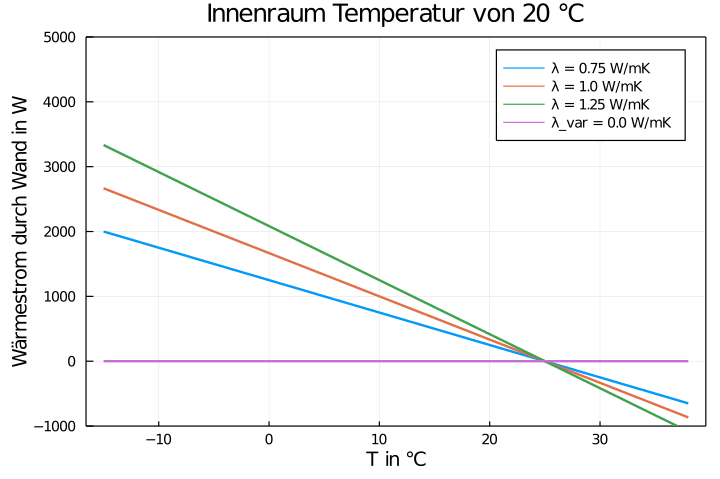

In [9]:
T_a = collect(-15:1:38) .+ 273.15

anim = @animate for λ_var = 0:0.1:2
    λ_arr = [0.75 1 1.25]
    f_Q_punkt(i) = -λ_arr[i] * A * (T_a .- T_i)/s

    #using LatexStrings
    plt = plot( T_a.-273.15, f_Q_punkt(1), 
                title = "Innenraum Temperatur von 20 °C",
                xlabel = "T in °C",
                ylabel = "Wärmestrom durch Wand in W", 
                label = "λ = " * string(λ_arr[1]) * " W/mK", 
                linewidth = 2,
                ylim = (-1000, 5000), dpi = 120, framestyle = :box)

    for i = 2:3
        plot!(plt,T_a.-273.15, f_Q_punkt(i), linewidth = 2,
              label = "λ = "*string(λ_arr[i])*" W/mK") 
    end

    plot!(plt,T_a.-273.15, (-λ_var * A * (T_a .- T_i)/s), 
            linewidth = 2, label = "λ_var = " * string(λ_var) * " W/mK") 
end

gif(anim, "anim_heat_transfer_coeff_wall.gif", fps = 2)

## ZA-1.1: 
_Implementieren Sie eine Funktion zur Änderung der Wandstärke s auf 0,5 m. Die Wärmeleitfähigkeit soll für dieses Beispiel weiter kostant bei $\lambda$ = 1 W/mK liegen._

Kopieren und komplettieren (an den markierten Stellen) Sie hierfür den folgenden Codeauschnitt in die folgende Zelle: 

``` Julia
λ=1 
s= # ... hier ändern
Q_punkt_addon = -λ * A * (T_a .- T_i) # ... hier ändern
```

In [ ]:
#hier den Code einfügen und editieren (Die Lösungen finden Sie unter "TP1_Lsgen.md")


Stellen Sie nun Ihr Ergebnis im Vergleich durch das Entfernen des Kommentarsymbols ("#") der letzten Zeile in der folenden Zelle dar:

In [ ]:
plt = plot(T_a.-273.15, (-λ * A * (T_a .- T_i)/0.3) , 
           xlabel = "T in °C", ylabel = "Wärmestrom durch Wand in W", 
           label = "λ = " * string(λ) * " W/(m K), s = 0,3 m",
           framestyle = :box, dpi = 120, linewidth = 2) 

# plot!(plt, T_a.-273.15, Q_punkt_addon, label= "λ = "*string(λ)*" W/(m K), s = " * string(s) * " m", linewidth = 2)